# This notebook is created to try out different things before implementing the efficiency test on pymesh

In [25]:
import pymesh
import numpy as np

In [26]:
box_1 = pymesh.generate_box_mesh(box_min = np.array([0, 0, 0]), box_max = np.array([25, 25, 25]))

In [27]:
box_small_1 = pymesh.generate_box_mesh(box_min = np.array([0, 0, 0]), box_max = np.array([1, 1, 1]))

box_small_2 = pymesh.generate_box_mesh(box_min = np.array([0.5, 0.5, 0.5]), 
box_max = np.array([1.5, 1.5, 1.5]))

In [28]:
grain_raw_mesh = pymesh.load_mesh("grains/Cuboctahedron.stl")


In [29]:
box_small_2 = pymesh.generate_box_mesh(box_min = np.array([0.5, 0.5, 0.5]), box_max = np.array([1.5, 1.5, 1.5]), num_samples=1,  using_simplex=True)

In [30]:
len(box_small_2.faces)

12

In [31]:
print("number of vertices before divison", len(box_small_2.faces))

number of vertices before divison 12


In [32]:
divided_mesh = pymesh.subdivide(box_small_2, order=1)

In [33]:
print("Number of vertices after division", len(divided_mesh.faces))

Number of vertices after division 48


In [34]:
print("Number of vertices after division", divided_mesh.num_vertices)

Number of vertices after division 26


In [35]:
# Genearte a 2D plane and play with the resolution

vertices = np.array([[0.0, 0.0], [0.0, 100], [0.0, 500], [0.0, 700],[1000, 80],[1000, 0.0], [1000, 1000],  [0.0, 1000]])
tri = pymesh.triangle()
# tri.segments = np.array([, )
tri.points = vertices
tri.split_boundary = False
tri.verbosity = 1
tri.run()
mesh = tri.mesh

In [36]:
len(mesh.faces)

8

In [37]:
pymesh.save_mesh("pymesh_divided_mesh.stl", divided_mesh)
import vedo
from vedo import Plotter
vp = Plotter(shape=(1, 1), interactive=0, axes=3)
vp.show(vp.load("pymesh_divided_mesh.stl"), at=0)

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[1.0173205080756889…

In [38]:
# Creating a wire network 
vertices = np.array([[0.0, 0.0, 0.0],[1.0, 0.0, 0.0], [1.0, 1.0, 0.0]])
edges = np.array([[0, 1],[0, 2],[1, 2],])
wires = pymesh.WireNetwork.create_from_data(vertices, edges)

wires.write_to_file("pymesh_wirentework.stl")

In [39]:
%time 
output_mesh = pymesh.boolean(grain_raw_mesh, box_small_2,operation='difference')

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs


In [40]:
%time 
output_mesh_cgal = pymesh.boolean(box_small_1, box_small_2,operation='intersection', engine='cgal')

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


## Now we try building a union of three boxes. 

In [41]:
box_sd_1 = pymesh.generate_box_mesh(box_min = np.array([0, 0, 0]), box_max = np.array([1, 1, 1]))

box_sd_2 = pymesh.generate_box_mesh(box_min = np.array([1.5, 0, 0]), 
box_max = np.array([2.5, 1, 1]))

box_sd_3 = pymesh.generate_box_mesh(box_min = np.array([3.5, 0, 0]), 
box_max = np.array([4.5, 1, 1]))

box_sd_4 = pymesh.generate_box_mesh(box_min = np.array([5.5, 0, 0]), 
box_max = np.array([6.5, 1, 1]))

box_sd_5 = pymesh.generate_box_mesh(box_min = np.array([7.5, 0, 0]), 
box_max = np.array([8.5, 1, 1]))

box_sd_6 = pymesh.generate_box_mesh(box_min = np.array([9.5, 0, 0]), 
box_max = np.array([10.5, 1, 1]))

box_sd_7 = pymesh.generate_box_mesh(box_min = np.array([11.5, 0, 0]), 
box_max = np.array([12.5, 1, 1]))

box_sd_8 = pymesh.generate_box_mesh(box_min = np.array([13.5, 0, 0]), 
box_max = np.array([14.5, 1, 1]))

### The follwoing two cells is the runtime comparison between union of a list of grain VS generating union grain by grain 

In [42]:
%%timeit
csg = pymesh.CSGTree({'union': [{"mesh": box_sd_1}, {"mesh": box_sd_2}, 
                                {"mesh": box_sd_3}, {"mesh": box_sd_4},
                                {"mesh": box_sd_5}, {"mesh": box_sd_6},
                                {"mesh": box_sd_7}, {"mesh": box_sd_8}]})

10 loops, best of 5: 74.1 ms per loop


In [43]:
%%timeit
list_of_box_sd = [box_sd_1, box_sd_2, box_sd_3, box_sd_4, box_sd_5, box_sd_6, box_sd_7, box_sd_8]

for number in range(len(list_of_box_sd)):
    if number==0:
        intermediate_union = list_of_box_sd[number]
    else:
        intermediate_union = pymesh.boolean(intermediate_union,list_of_box_sd[number],"union")


10 loops, best of 5: 106 ms per loop


In [44]:
%%timeit
# Generate a grid of cubes and their union 
number = 5
distance = 4 
list_of_box_dict = []
scale = 1

for element in range(number):
    for iterator in range(number ** 2):
        reminder = iterator % number
        if reminder == 0:
            position = iterator // number
        else:
            position = reminder 
        new_box =  pymesh.generate_box_mesh(
            box_min = np.array([element * distance, position * distance, number * distance]), 
            box_max = np.array([element * distance + scale, position * distance + scale, number * distance + scale]))
        new_box_dict = {"mesh": new_box}
        list_of_box_dict.append(new_box_dict)

CSG_grid_generation = pymesh.CSGTree({'union': list_of_box_dict})
print(list_of_box_dict[0]["mesh"])

1 loop, best of 5: 2.4 s per loop


In [45]:
for number in range(len(list_of_grain_dict)):
    grain = pymesh.boolean(list_of_box_dict[number]["mesh"])

    

NameError: name 'list_of_grain_dict' is not defined

In [46]:
%%time
# generate the cube block that sits beneath the grain
number = 5
distance = 4 
list_of_grain_dict = []
scale = 1
cube_block = pymesh.generate_box_mesh(box_min = [0, 0, 0], box_max = [number * distance + 1, number * distance + scale + 1, number * distance + scale])

cube_block_dict = {"mesh": cube_block}

CPU times: user 1.08 ms, sys: 278 µs, total: 1.36 ms
Wall time: 1.33 ms


In [47]:
cube_block

In [52]:
%%time
for orders in [1,2,3,4,5,6,7,8,9]:
    print("The number of triangels before remeshing",len(cube_block.faces))
    divide_cube = pymesh.subdivide(cube_block, order=orders)
    print("The number of faces after subdivision", len(divide_cube.faces))
    pymesh.save_mesh("pymesh_cube_" + str(orders) + "_numbers_.stl", divide_cube)

The number of triangels before remeshing 12
The number of faces after subdivision 48
The number of triangels before remeshing 12
The number of faces after subdivision 192
The number of triangels before remeshing 12
The number of faces after subdivision 768
The number of triangels before remeshing 12
The number of faces after subdivision 3072
The number of triangels before remeshing 12
The number of faces after subdivision 12288
The number of triangels before remeshing 12
The number of faces after subdivision 49152
The number of triangels before remeshing 12
The number of faces after subdivision 196608
The number of triangels before remeshing 12
The number of faces after subdivision 786432
The number of triangels before remeshing 12
The number of faces after subdivision 3145728
CPU times: user 1min 40s, sys: 2.71 s, total: 1min 43s
Wall time: 1min 57s


In [2]:
%%time
loaded_cube = pymesh.load_mesh("pymesh_million_triangle_per_side_cube.stl")

CPU times: user 10min 11s, sys: 9.03 s, total: 10min 20s
Wall time: 4min 48s


In [10]:
loaded_cube.vertices

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.05078125e-02],
       [0.00000000e+00, 0.00000000e+00, 4.10156250e-02],
       ...,
       [2.10000000e+01, 2.20000000e+01, 2.09589844e+01],
       [2.10000000e+01, 2.20000000e+01, 2.09794922e+01],
       [2.10000000e+01, 2.20000000e+01, 2.10000000e+01]])

In [12]:
CSG_entire_tree = pymesh.CSGTree({'difference': [cube_block_dict, CSG_grid_generation]})

In [13]:
output_mesh = CSG_entire_tree.mesh

In [14]:
pymesh.save_mesh("pymesh_25grid_cube_difference.stl", output_mesh)

In [15]:
import vedo
from vedo import *
load_pymesh = vedo.load("pymesh_25grid_cube_difference.stl")


In [16]:
vp = Plotter(shape=(1, 1), interactive=0, axes=3)
vp.show(load_pymesh, at=0)

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[10.869594372251527…

## Time comparison between 2 different intersection method: intersect & loop  VS union & intersect

In [71]:
# Generate a grid of cubes and the cube beneath
number = 10
distance = 4 
list_of_grain_dict = []
scale = 1
grain = pymesh.load_mesh("grains/Cuboctahedron.stl")

for element in range(number):
    for iterator in range(number ** 2):
        reminder = iterator % number
        if reminder == 0:
            position = iterator // number
        else:
            position = reminder 

        new_grain =  pymesh.generate_box_mesh(
            box_min = np.array([element * distance, position * distance, number * distance]), 
            box_max = np.array([element * distance + scale, position * distance + scale, number * distance + scale]))
        new_grain_dict = {"mesh": new_grain}
        list_of_grain_dict.append(new_grain_dict)

# generate the cube block that sits beneath the grain
cube_block = pymesh.generate_box_mesh(box_min = [0, 0, 0], box_max = [number * distance + 1, number * distance + scale + 1, number * distance + scale])

cube_block_dict = {"mesh": cube_block}


In [67]:
# using a grid of mesh
# Generate a grid of mesh and the cube beneath
number = 20
distance = 4 
list_of_grain_dict = []
scale = 1
grain_raw_mesh = pymesh.load_mesh("grains/Cuboctahedron.stl")

for element in range(number):
    for iterator in range(number ** 2):
        reminder = iterator % number
        if reminder == 0:
            position = iterator // number
        else:
            position = reminder 

        new_grain =  pymesh.form_mesh(grain_raw_mesh.vertices + [element * distance + scale, position * distance + scale, number * distance + scale], grain_raw_mesh.faces)
        new_grain_dict = {"mesh": new_grain}
        list_of_grain_dict.append(new_grain_dict)

# generate the cube block that sits beneath the grain
cube_block = pymesh.generate_box_mesh(box_min = [0, 0, 0], box_max = [number * distance + 1, number * distance + scale + 1, number * distance + scale])

cube_block_dict = {"mesh": cube_block}

In [73]:
%%time
for element in list_of_grain_dict:
    CSG_iteration_tree = pymesh.CSGTree({'difference': [cube_block_dict, element]})
    cube_block_dict = CSG_iteration_tree


KeyboardInterrupt: 

In [72]:
%%time 
CSG_grid_generation = pymesh.CSGTree({'union': list_of_grain_dict})
CSG_entire_tree = pymesh.CSGTree({'difference': [cube_block_dict, CSG_grid_generation]})


CPU times: user 32 s, sys: 782 ms, total: 32.8 s
Wall time: 21.2 s


In [65]:
pymesh.save_mesh("pymesh_100grid_grain_difference.stl", CSG_entire_tree .mesh)

In [55]:
pymesh.save_mesh("25_grid_grain.stl", CSG_grid_generation.mesh)

In [66]:
vp = Plotter(shape=(1, 1), interactive=0, axes=3)
vp.show(vp.load("pymesh_100grid_grain_difference.stl"), at=0)

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[21.21596089278675,…

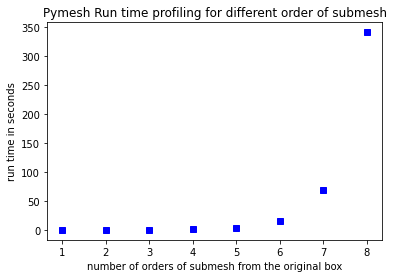

<Figure size 432x288 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt


order_number = [1,2,3,4,5,6,7,8]
runtime_collection = [0.6958577019999979, 0.7103802989999934, 0.9455233959999987, 1.6924205319999999, 4.420805658000006, 16.303753358999998, 70.07572872, 341.05427313]
plt.figure()
plt.plot(order_number, runtime_collection,'bs')
plt.xlabel("number of orders of submesh from the original box")
plt.ylabel("run time in seconds")
plt.title("Pymesh Run time profiling for different order of submesh")
plt.show()
plt.savefig("pymesh_runtime_submesh_scaling.png")

In [56]:
plt.savefig("pymesh_runtime_submesh_scaling.png")

<Figure size 432x288 with 0 Axes>